<a href="https://colab.research.google.com/github/Shri-Aakash/tensorflow-1-public/blob/main/Cats_and_dogs_CNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Extract Zipfile

In [3]:
!mkdir /content/Dataset

In [4]:
! unzip /content/drive/MyDrive/archive.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/Animal Images/dogs/dog.441.jpg  
  inflating: /content/Animal Images/dogs/dog.4410.jpg  
  inflating: /content/Animal Images/dogs/dog.4411.jpg  
  inflating: /content/Animal Images/dogs/dog.4412.jpg  
  inflating: /content/Animal Images/dogs/dog.4413.jpg  
  inflating: /content/Animal Images/dogs/dog.4414.jpg  
  inflating: /content/Animal Images/dogs/dog.4415.jpg  
  inflating: /content/Animal Images/dogs/dog.4416.jpg  
  inflating: /content/Animal Images/dogs/dog.4417.jpg  
  inflating: /content/Animal Images/dogs/dog.4418.jpg  
  inflating: /content/Animal Images/dogs/dog.4419.jpg  
  inflating: /content/Animal Images/dogs/dog.442.jpg  
  inflating: /content/Animal Images/dogs/dog.4420.jpg  
  inflating: /content/Animal Images/dogs/dog.4421.jpg  
  inflating: /content/Animal Images/dogs/dog.4422.jpg  
  inflating: /content/Animal Images/dogs/dog.4423.jpg  
  inflating: /content/Animal Images/dogs/dog.4424.jpg  

In [5]:
! mv /content/"Animal Images"/cats /content/Dataset/

In [6]:
!mv /content/"Animal Images"/dogs /content/Dataset/

In [7]:
!rm -rf /content/"Animal Images"

In [8]:
random.seed(42)

## Preparing dataset by importing data and splitting it into train,test and validation

In [9]:
catList=[]
dogList=[]

In [10]:
datasetPath='/content/Dataset'

In [11]:
for root,dirs,_ in os.walk(datasetPath):
    for _dir in dirs:
        if _dir=='cats':
            catList=os.listdir(os.path.join(root,_dir))
        elif _dir=='dogs':
            dogList=os.listdir(os.path.join(root,_dir))

In [12]:
## Shuffle the lists using random
random.shuffle(catList)
random.shuffle(dogList)

In [13]:
print(catList)
print(dogList)

['cat.3681.jpg', '_4e6b287.jpg', 'Maine_Coon_186.jpg', 'Abyssinian_174.jpg', '2015-01-23_904424845661785014.jpg', '00001379_022.jpg', 'cat.643.jpg', 'Bengal_13.jpg', '2014-07-16_765587370768943504.jpg', '2012-06-19_216790084059148069.jpg', '2012-09-30_291870456165445085.jpg', '2022-07-11_2880255536253155548.jpg', 'Sphynx_104.jpg', 'cat.1354.jpg', 'cat.3753.jpg', '93dd692.jpg', 'cat.3025.jpg', '_d23694a-1.jpg', '2016-06-08_1268222411484252656.jpg', '2016-05-07_1245010544284747984.jpg', 'cat.300.jpg', '2015-06-01_997461900968414191.jpg', 'Abyssinian_116.jpg', 'cat.4235.jpg', '2015-12-03_1131577283135752940.jpg', 'cat.1456.jpg', 'cat.1526.jpg', 'cat.1974.jpg', 'cat.4402.jpg', '2013-12-20_614900539426424913.jpg', 'cat.348.jpg', '00001446_011.jpg', 'Persian_32.jpg', '2015-08-23_1057902648859380230.jpg', 'cat.2518.jpg', '2012-06-04_206433104241110443.jpg', 'cat.308.jpg', '00001326_024.jpg', 'cat.3109.jpg', 'cat.804.jpg', '120567e.jpg', '2016-01-11_1160302599492422148.jpg', 'cat.1106.jpg', 'c

In [14]:
catTrainPath=os.path.join(datasetPath,'train','cat')
dogTrainPath=os.path.join(datasetPath,'train','dog')
catTestPath=os.path.join(datasetPath,'test','cat')
dogTestPath=os.path.join(datasetPath,'test','dog')
catValPath = os.path.join(datasetPath,'val','cat')
dogValPath=os.path.join(datasetPath,'val','dog')

In [15]:
catTrainSize=int(0.7*len(catList))
catTestSize=int(0.15*len(catList))
catValSize=int(0.15*len(catList))

print(f"******************Cat Train size:{catTrainSize}")
print(f"******************Cat Test size:{catTestSize}")
print(f"******************Cat Val size:{catValSize}")


dogTrainSize=int(0.7*len(dogList))
dogTestSize=int(0.15*len(dogList))
dogValSize=int(0.15*len(dogList))

print(f"******************Dog Train size:{dogTrainSize}")
print(f"******************Dog Test size:{dogTestSize}")
print(f"******************Dog Val size:{dogValSize}")

******************Cat Train size:10542
******************Cat Test size:2259
******************Cat Val size:2259
******************Dog Train size:10501
******************Dog Test size:2250
******************Dog Val size:2250


#### Copy images of dogs and cats into train,test and validation folders
Basically the structure is going to become like :
<pre>
Dataset
|
|-----Train
|       |
|       ---cat
|       ---dog
|
|-----Test
|       |
|       ---cat
|       ---dog
|
|-----Val
|       |
|       ---cat
|       ---dog
</pre>

Copy the cat images into train,test and validation folders

In [16]:
for folder_path in [catTrainPath,catTestPath,catValPath]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

for i,f in enumerate(catList):
    if i<catTrainSize:
        dest_folder=catTrainPath
    elif i<catTrainSize+catValSize:
        dest_folder=catValPath
    else:
        dest_folder=catTestPath
    shutil.copy(os.path.join('Dataset','cats',f),os.path.join(dest_folder,f))

Copy the dog images into train,test and validation folders

In [17]:
for folder_path in [dogTrainPath,dogTestPath,dogValPath]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

for i,f in enumerate(dogList):
    if i<dogTrainSize:
        dest_folder=dogTrainPath
    elif i<dogTrainSize+dogValSize:
        dest_folder=dogValPath
    else:
        dest_folder=dogTestPath
    shutil.copy(os.path.join('Dataset','dogs',f),os.path.join(dest_folder,f))

#### Check that length of train,validation and test size for each of the categories matches the number of images in the respective folder

In [18]:
assert len(os.listdir(os.path.join('Dataset','train','cat')))==catTrainSize
assert len(os.listdir(os.path.join('Dataset','val','cat')))==catValSize
assert len(os.listdir(os.path.join('Dataset','test','cat')))==catTestSize

assert len(os.listdir(os.path.join('Dataset','train','dog')))==dogTrainSize
assert len(os.listdir(os.path.join('Dataset','val','dog')))==dogValSize
assert len(os.listdir(os.path.join('Dataset','test','dog')))==dogTestSize+1

In [19]:
len(os.listdir('/content/Dataset/train/cat'))

10542

### Removing the cats and dogs directory

In [20]:
shutil.rmtree(os.path.join(datasetPath,'cats'))
shutil.rmtree(os.path.join(datasetPath,'dogs'))

## Inspecting the images

In [22]:
from matplotlib import image as img
from matplotlib import pyplot as plt

In [21]:
catImg=os.listdir(os.path.join(datasetPath,'train','cat'))[0]

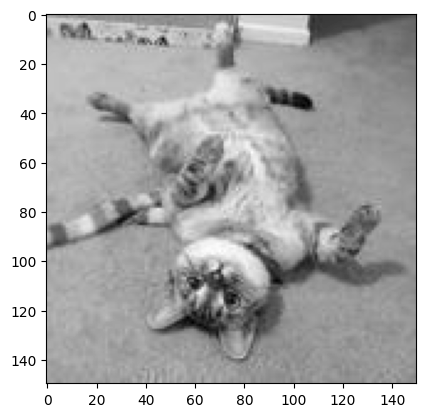

In [23]:
## Read a cat image from train directory
image=img.imread(os.path.join(datasetPath,'train','cat',catImg))
plt.imshow(image,cmap='gray')

In [24]:
print(image.max())
print(image.min())

255
0


In [25]:
image.astype(dtype=np.float16)

array([[154., 143., 136., ...,  77.,  79.,  80.],
       [178., 173., 169., ...,  86.,  89.,  90.],
       [205., 206., 207., ...,  98., 100., 100.],
       ...,
       [165., 160., 155., ..., 141., 137., 133.],
       [160., 161., 161., ..., 141., 139., 140.],
       [155., 162., 165., ..., 137., 139., 145.]], dtype=float16)

## Creating ImageGenerator using Tensorflow which will read the classes and images from the directory structure

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)


In [48]:
train_generator=train_datagen.flow_from_directory(directory=os.path.join(datasetPath,'train'),
                                                                        target_size=(256,256),
                                                                        color_mode='grayscale',
                                                                        class_mode='binary')

Found 21042 images belonging to 2 classes.


In [49]:
val_generator=val_datagen.flow_from_directory(directory=os.path.join(datasetPath,'val'),
                                                                        target_size=(256,256),
                                                                        color_mode='grayscale',
                                                                        class_mode='binary')

Found 4509 images belonging to 2 classes.


In [62]:
test_generator=test_datagen.flow_from_directory(directory=os.path.join(datasetPath,'test'),
                                                                        target_size=(256,256),
                                                                        color_mode='grayscale',
                                                                        class_mode='binary')

Found 4510 images belonging to 2 classes.


## Defnining model using Tensorflow

In [51]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(256,256,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)       

In [53]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Defining the callbacks

In [64]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('val_accuracy')>0.95:
            print("Accuracy reached 95 percent so stopping training")
            self.model.stop_training=True

In [65]:
model_path='models'
if not os.path.exists(model_path):
    os.makedirs(model_path)
modelCheckPoint=tf.keras.callbacks.ModelCheckpoint(os.path.join(model_path,'{val_accuracy:.4f}.keras'),monitor='val_accuracy',mode='max',save_best_only=True)

In [66]:
callbacks=[myCallback(),modelCheckPoint]

## Training the model

In [67]:
history=model.fit(train_generator,
                  epochs=15,
                  verbose=1,
                  validation_data=val_generator,
                  callbacks=callbacks)

Epoch 1/15
  6/658 [..............................] - ETA: 29s - loss: 0.2543 - accuracy: 0.9062

658/658 [==============================] - 31s 46ms/step - loss: 0.0227 - accuracy: 0.9937 - val_loss: 2.9760 - val_accuracy: 0.7412
Epoch 2/15
658/658 [==============================] - 30s 46ms/step - loss: 0.0201 - accuracy: 0.9960 - val_loss: 3.2756 - val_accuracy: 0.7376
Epoch 3/15
658/658 [==============================] - 29s 44ms/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 3.0004 - val_accuracy: 0.7303
Epoch 4/15
554/658 [========================>.....] - ETA: 3s - loss: 0.0155 - accuracy: 0.9967

KeyboardInterrupt: 

In [69]:
new_model=tf.keras.models.load_model('/content/models/0.7563.keras')

In [70]:
model.evaluate(test_generator)

141/141 [==============================] - 5s 34ms/step - loss: 2.3719 - accuracy: 0.7874


[2.3718903064727783, 0.7873614430427551]